# 1) Download DF

In [ ]:
m1 = SocialETL(query="(#slavaukraini OR #stopwarinukraine OR #istandwithputin)", pages=800, recent=False) 

In [23]:
m1.df=m1.df.dropna(subset=['entities.hashtags'])
m1.df=m1.df.dropna(subset=['retweeted_user_id'])

In [24]:
m1.df['entities.hashtags']=m1.df['entities.hashtags'].apply(eval)
m1.df['entities.hashtags']=m1.df['entities.hashtags'].map(h.extract_tags)

In [25]:
df_nodes=pd.DataFrame({"user_id":m1.df['author_id'],
                       'tweet_id':m1.df['id'],
                      'retweet_id': m1.df['retweeted_user_id'],
                      "hashtag":m1.df['entities.hashtags'],
                     'location':m1.df['author.location'],
                     'verified':m1.df['author.verified']
                      })

In [26]:
#df_proukr.set_index('user_id',inplace=True)
df_nodes.shape

(44812, 6)

In [27]:
df_nodes.to_csv('df_nodes.csv')

## preprocessing 

In [2]:
df_nodes=pd.read_csv('df_nodes.csv')
del df_nodes['Unnamed: 0']

In [3]:
df_nodes=df_nodes.set_index('user_id') #,inplace=True)

In [4]:
df_nodes

,tweet_id,retweet_id,hashtag,location,verified
user_id,,,,,
1007449601400541184,1503521257177948170,278369814,"['putin', 'slavaukraini']","Mobile, AL",False
1464582321533767695,1503521249850363904,291496884,"['stopputin', 'stopwar', 'stopwarinukraine']",NaN,False
1245946724994158592,1503521066739589120,3312966191,"['standwithukraine', 'stopputinnow', 'slavaukr...",NaN,False
854862661,1503521023450361861,465973,['slavaukraini'],NaN,False
42746752,1503520988297932802,1456400208431091712,"['dogsoftwittter', 'dogsoftwitter', 'stoprussi...","Northeast Ohio, USA",False
...,...,...,...,...,...
396145409,1501662088846061577,191393940,"['slavaukraini', 'standwithukraine']","West Midlands, England",False
1486393266782314498,1501662072094048266,279390084,"['fckptn', 'slavaukraini']",NaN,False
1390353643,1501662038195638272,1192160073897988096,"['standwithukraine', 'istandwithukraine', 'sla...",County Cork,False


In [5]:
df_nodes.index=df_nodes.index.map(int)
df_nodes['hashtag']=df_nodes['hashtag'].map(str).apply(eval)
df_nodes['tweet_id']=df_nodes['tweet_id'].map(str).apply(eval)
df_nodes['retweet_id']=df_nodes['retweet_id'].map(str).apply(eval)
df_nodes['location']=df_nodes['location'].map(str)#.apply(eval)
df_nodes['verified']=df_nodes['verified'].map(str).apply(eval)

In [6]:
df_nodes.shape

(47853, 5)

In [7]:
df_nodes.head(3)

,tweet_id,retweet_id,hashtag,location,verified
user_id,,,,,
1007449601400541184,1503521257177948170,278369814,"[putin, slavaukraini]","Mobile, AL",False
1464582321533767695,1503521249850363904,291496884,"[stopputin, stopwar, stopwarinukraine]",nan,False
1245946724994158592,1503521066739589120,3312966191,"[standwithukraine, stopputinnow, slavaukraini]",nan,False


In [8]:
#convert nested lists on set
def to_sets(nested_lists): 
    outer_list = set()
    for el in nested_lists: 
        if type(el) == list: 
            outer_list.update(el) 
        else: 
            outer_list.add(el)
    return outer_list
df_nodes['hashtag']=df_nodes['hashtag'].map(to_sets)

In [9]:
df_nodes.head(3)

,tweet_id,retweet_id,hashtag,location,verified
user_id,,,,,
1007449601400541184,1503521257177948170,278369814,"{slavaukraini, putin}","Mobile, AL",False
1464582321533767695,1503521249850363904,291496884,"{stopputin, stopwar, stopwarinukraine}",nan,False
1245946724994158592,1503521066739589120,3312966191,"{standwithukraine, stopputinnow, slavaukraini}",nan,False


In [10]:
df_nodes.loc[df_nodes['location']=='nan']

,tweet_id,retweet_id,hashtag,location,verified
user_id,,,,,
1464582321533767695,1503521249850363904,291496884,"{stopputin, stopwar, stopwarinukraine}",nan,False
1245946724994158592,1503521066739589120,3312966191,"{standwithukraine, stopputinnow, slavaukraini}",nan,False
854862661,1503521023450361861,465973,{slavaukraini},nan,False
1298987457908633602,1503520942147969038,81599450,"{slavaukraini, johnsonout49}",nan,False
1265688143698685952,1503520921038245888,1437315069000314888,"{taipei, slavaukraini, ukraine}",nan,False
...,...,...,...,...,...
1438502419801903108,1501662278235602951,1496810215680978954,"{russiaukraine, kyiv, russianukrainianwar, bre...",nan,False
1325145636153356290,1501662276977311750,191393940,"{standwithukraine, slavaukraini}",nan,False
4033666373,1501662191811977221,1205226529455632385,{slavaukraini},nan,False


# 2) Categorizzazione utenti

In [11]:
set_user=set(df_nodes.index)
print(len(set_user))

32382


In [ ]:
cat = CategorizeUsers(set_user, pages=1) #max_results=100 from 15-2 to 15-3

In [12]:
with open('categorize.json', 'r') as f:
    cat = json.load(f)
cat

{'1126026130203582464': 'proukr',
 '1301204310206840833': 'proukr',
 '1276426094242127874': 'proukr',
 '914089454511439875': 'proukr',
 '892318583748820994': 'proukr',
 '1233535933154197508': 'proukr',
 '1321173403429150726': 'proukr',
 '1265033587335757828': 'proukr',
 '1497612213766471688': 'proukr',
 '1410177732483317769': 'proukr',
 '1496871443505815561': 'proukr',
 '1357708828083683331': 'proukr',
 '1243995914341056517': 'proukr',
 '1316629728296566789': 'proukr',
 '1374989164664520711': 'proukr',
 '1473401352567070726': 'proukr',
 '1384173653743443975': 'proukr',
 '1444306356073340936': 'proukr',
 '1497189220443693066': 'proukr',
 '1437164333931372557': 'proukr',
 '42991636': 'proukr',
 '1472639914059702289': 'proukr',
 '54566935': 'proukr',
 '1497132750205247512': 'proukr',
 '288718876': 'proukr',
 '295231519': 'proukr',
 '1496946156487819297': 'proukr',
 '1310289087702630447': 'proukr',
 '515006515': 'proukr',
 '3338772538': 'proukr',
 '1286905933': 'proukr',
 '15794264': 'prou

In [13]:
c_proukr = 0
c_pax = 0
c_nocare = 0
c_prorus= 0

for v in cat.values():
    if v == "proukr":
        c_proukr += 1 
    elif v == "pax":
        c_pax += 1
    elif v == "prorus":
        c_prorus += 1
    else:
        c_nocare += 1

print('TOT USERS = {} \n'
      'proukr = {} \n'
      'pax = {} \n'
      'prorus = {} \n'
      'nocare = {} \n'.format(len(cat),c_proukr,c_pax, c_prorus, c_nocare))

TOT USERS = 32382 
proukr = 21987 
pax = 6921 
prorus = 1266 
nocare = 2208 



In [14]:
user_node=[]
user_cat=[]
for k,v in cat.items():
    user_node.append(k)
    user_cat.append(v)

In [15]:
df_cat=pd.DataFrame({'user_id':user_node,
                     'cat': user_cat})
df_cat=df_cat.set_index('user_id')
df_cat.index=df_cat.index.map(int)

In [16]:
df_cat

,cat
user_id,
1126026130203582464,proukr
1301204310206840833,proukr
1276426094242127874,proukr
914089454511439875,proukr
892318583748820994,proukr
...,...
14106605,proukr
2243559410,proukr
978460662,proukr


In [17]:
#copy of the dataset with distinct index
#copy because duplicates need to accounted to assign weights
df_nodes_copy = df_nodes[~df_nodes.index.duplicated(keep='first')]
df_nodes_copy

,tweet_id,retweet_id,hashtag,location,verified
user_id,,,,,
1007449601400541184,1503521257177948170,278369814,"{slavaukraini, putin}","Mobile, AL",False
1464582321533767695,1503521249850363904,291496884,"{stopputin, stopwar, stopwarinukraine}",nan,False
1245946724994158592,1503521066739589120,3312966191,"{standwithukraine, stopputinnow, slavaukraini}",nan,False
854862661,1503521023450361861,465973,{slavaukraini},nan,False
42746752,1503520988297932802,1456400208431091712,"{dogsoftwittter, pup, stoprussia, war, stopput...","Northeast Ohio, USA",False
...,...,...,...,...,...
396145409,1501662088846061577,191393940,"{standwithukraine, slavaukraini}","West Midlands, England",False
1486393266782314498,1501662072094048266,279390084,"{fckptn, slavaukraini}",nan,False
1390353643,1501662038195638272,1192160073897988096,"{standwithukraine, istandwithukraine, slavaukr...",County Cork,False


In [18]:
df_final=pd.concat(objs=[df_nodes_copy,df_cat], axis=1)

In [19]:
df_final

,tweet_id,retweet_id,hashtag,location,verified,cat
user_id,,,,,,
290883,1502663077191426051,2956836471,"{johnsonout47, nhsbadbill, slavaukraini}",European Union,False,pax
298073,1503178785746685954,889765401822973952,{slavaukraini},nan,False,proukr
611093,1501988978345627654,56698771,"{ukraine, standwithukraine, odesa, slavaukrain...",istanbul,False,pax
699793,1502982769219371008,154830217,"{slavaukraini, ukrainerussiawar}",Pale Blue Dot/127.0.0.1,False,pax
756049,1502704662138568705,1255561430,"{slavaukraini, ukraine}",France,False,proukr
...,...,...,...,...,...,...
1503222685484081154,1503248107512942593,1447150441481965568,"{istandwithputin, supportrussia, standwithruss...",nan,False,proukr
1503274603770171392,1503280632209756160,1390437709286715403,"{istandwithputin, putler}",nan,False,proukr
1503322318461968385,1503421219877568515,1455570393368956936,"{standwithputin, istandwithputin, standwithrus...",Occupied America,False,proukr


In [20]:
#dataet con utenti distinti per creazine nodi rete
df_final.to_csv('df_final.csv')

In [3]:
df_final=pd.read_csv('df_final.csv')
df_final=df_final.set_index('user_id')

In [4]:
df_final

,tweet_id,retweet_id,hashtag,location,verified,cat
user_id,,,,,,
290883,1502663077191426051,2956836471,"{'johnsonout47', 'nhsbadbill', 'slavaukraini'}",European Union,False,pax
298073,1503178785746685954,889765401822973952,{'slavaukraini'},NaN,False,proukr
611093,1501988978345627654,56698771,"{'ukraine', 'standwithukraine', 'odesa', 'slav...",istanbul,False,pax
699793,1502982769219371008,154830217,"{'slavaukraini', 'ukrainerussiawar'}",Pale Blue Dot/127.0.0.1,False,pax
756049,1502704662138568705,1255561430,"{'slavaukraini', 'ukraine'}",France,False,proukr
...,...,...,...,...,...,...
1503222685484081154,1503248107512942593,1447150441481965568,"{'istandwithputin', 'supportrussia', 'standwit...",NaN,False,proukr
1503274603770171392,1503280632209756160,1390437709286715403,"{'istandwithputin', 'putler'}",NaN,False,proukr
1503322318461968385,1503421219877568515,1455570393368956936,"{'standwithputin', 'istandwithputin', 'standwi...",Occupied America,False,proukr


# 3 Creazione rete

In [9]:
G = nx.Graph()

In [10]:
for i,e in df_final.iterrows():
    G.add_node(i, category=df_final['cat'][i]) #, location=df_final['location'][i] verified=df_final['verified'][i],

In [11]:
list(G.nodes.data())

[(290883, {'category': 'pax'}),
 (298073, {'category': 'proukr'}),
 (611093, {'category': 'pax'}),
 (699793, {'category': 'pax'}),
 (756049, {'category': 'proukr'}),
 (800485, {'category': 'pax'}),
 (810603, {'category': 'dontcare'}),
 (916201, {'category': 'pax'}),
 (917131, {'category': 'proukr'}),
 (1050111, {'category': 'proukr'}),
 (1054431, {'category': 'proukr'}),
 (1080161, {'category': 'dontcare'}),
 (1111871, {'category': 'proukr'}),
 (1471971, {'category': 'proukr'}),
 (1524781, {'category': 'pax'}),
 (1630511, {'category': 'proukr'}),
 (1772721, {'category': 'proukr'}),
 (2002721, {'category': 'proukr'}),
 (2052911, {'category': 'pax'}),
 (2364531, {'category': 'pax'}),
 (2462851, {'category': 'proukr'}),
 (2827221, {'category': 'dontcare'}),
 (3306811, {'category': 'proukr'}),
 (3554911, {'category': 'proukr'}),
 (3632161, {'category': 'pax'}),
 (3688111, {'category': 'proukr'}),
 (3796501, {'category': 'proukr'}),
 (3799971, {'category': 'proukr'}),
 (4254951, {'category'

In [12]:
#dataset con tutti gli utenti non distinti per creazione link + pesi
df_nodes=pd.read_csv('df_nodes.csv')
df_nodes=df_nodes.set_index('user_id')

In [13]:
#PRIMA DATASET-->POI DIZIONARIO--->POI COLLEGARE LINK CON NODI + PESI
from_u=[]
to_u=[]
for u, user in enumerate(df_nodes.index):
    #print('u',user, type(user))
    for r,ret in enumerate(df_nodes['retweet_id']):
        #print('ret',ret, type(ret))
        if user==ret and user!=df_nodes.index[r]:
                from_u.append(user)
                to_u.append(df_nodes.index[r])

In [14]:
df=pd.DataFrame({'from':from_u,
                'to':to_u})
df.shape

(224286, 2)

In [17]:
for i,e in df.iterrows():
    G.add_edge(df['from'][i],df['to'][i]) #, weight=df_weighted['weights'][i] )

In [20]:
print('numero di links = ',G.number_of_edges())
print('lista links:')
list(G.edges.data())

numero di links =  12767
lista links:


[(290883, 2956836471, {}),
 (1054431, 976028069168402433, {}),
 (1471971, 1205226529455632385, {}),
 (2052911, 1401015246718914560, {}),
 (2052911, 1353366187791560704, {}),
 (2052911, 2202063265, {}),
 (2052911, 1317817827970134025, {}),
 (2052911, 316797199, {}),
 (2827221, 4018888580, {}),
 (3688111, 1499295169870319616, {}),
 (4254951, 282076470, {}),
 (4615341, 27493883, {}),
 (4937571, 4018888580, {}),
 (5404582, 2322424306, {}),
 (5516892, 4018888580, {}),
 (5749002, 2301844336, {}),
 (5849252, 1142623492141211650, {}),
 (6266142, 1081484761934319623, {}),
 (6266142, 2956836471, {}),
 (6691762, 906273126, {}),
 (6691762, 930458352, {}),
 (6691762, 2986274967, {}),
 (6691762, 440756482, {}),
 (6691762, 1131577366105526272, {}),
 (6691762, 1247652514478112773, {}),
 (6691762, 1044973248, {}),
 (6691762, 536549984, {}),
 (6691762, 3380227725, {}),
 (6691762, 364702177, {}),
 (6691762, 2202220496, {}),
 (7078452, 282076470, {}),
 (7703052, 1235584294111850496, {}),
 (7777302, 127013

In [21]:
G.remove_edges_from(list(nx.selfloop_edges(G))) #rimuovere selfloops
G.remove_nodes_from(list(nx.isolates(G)))       #rimuovere nodi isolati

In [23]:
c=0
for component in list(nx.connected_components(G)):
    c += 1
print('number of nodes = {} \n'
    'number of edges = {} \n'
    'number of components = {}'.format(G.number_of_nodes(), G.number_of_edges(),c))

number of nodes = 11197 
number of edges = 12767 
number of components = 225


In [24]:
nx.write_gexf(G,'net_with_components.gexf')

In [25]:
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[10184,
 37,
 33,
 28,
 26,
 21,
 19,
 18,
 18,
 16,
 16,
 14,
 14,
 14,
 13,
 13,
 12,
 12,
 11,
 10,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [26]:
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
print(len(S))

225


In [27]:
for e in S:
    print(e)

Graph with 10184 nodes and 11968 edges
Graph with 2 nodes and 1 edges
Graph with 3 nodes and 2 edges
Graph with 5 nodes and 4 edges
Graph with 37 nodes and 40 edges
Graph with 3 nodes and 2 edges
Graph with 4 nodes and 3 edges
Graph with 6 nodes and 5 edges
Graph with 3 nodes and 2 edges
Graph with 3 nodes and 2 edges
Graph with 2 nodes and 1 edges
Graph with 2 nodes and 1 edges
Graph with 18 nodes and 20 edges
Graph with 7 nodes and 6 edges
Graph with 2 nodes and 1 edges
Graph with 2 nodes and 1 edges
Graph with 14 nodes and 13 edges
Graph with 11 nodes and 10 edges
Graph with 14 nodes and 13 edges
Graph with 6 nodes and 5 edges
Graph with 28 nodes and 27 edges
Graph with 6 nodes and 5 edges
Graph with 6 nodes and 5 edges
Graph with 26 nodes and 25 edges
Graph with 3 nodes and 2 edges
Graph with 3 nodes and 2 edges
Graph with 16 nodes and 15 edges
Graph with 2 nodes and 1 edges
Graph with 3 nodes and 2 edges
Graph with 6 nodes and 5 edges
Graph with 3 nodes and 2 edges
Graph with 5 no

In [28]:
for i,e in enumerate(S):
    print('component',i)
    print(list(e.nodes.data()))

component 0
[(290883, {'category': 'pax'}), (1471971, {'category': 'proukr'}), (2052911, {'category': 'pax'}), (2827221, {'category': 'dontcare'}), (3688111, {'category': 'proukr'}), (4254951, {'category': 'proukr'}), (4615341, {'category': 'proukr'}), (4937571, {'category': 'pax'}), (5404582, {'category': 'pax'}), (5516892, {'category': 'proukr'}), (5749002, {'category': 'proukr'}), (5849252, {'category': 'proukr'}), (6266142, {'category': 'proukr'}), (6691762, {'category': 'proukr'}), (7078452, {'category': 'proukr'}), (7703052, {'category': 'proukr'}), (7777302, {'category': 'proukr'}), (8007502, {'category': 'proukr'}), (8052182, {'category': 'proukr'}), (9063952, {'category': 'proukr'}), (9147152, {'category': 'proukr'}), (9731332, {'category': 'dontcare'}), (11025592, {'category': 'proukr'}), (11076222, {'category': 'dontcare'}), (11486222, {'category': 'dontcare'}), (11567702, {'category': 'pax'}), (12512292, {'category': 'proukr'}), (12610772, {'category': 'pax'}), (13301942, {

In [29]:
#remove small components
c=0
th=40
for component in list(nx.connected_components(G)):
    c += 1
    if len(component)<th:
        for node in component:
            G.remove_node(node)

number of nodes = 10184 
number of edges = 11968 
number of components = 1


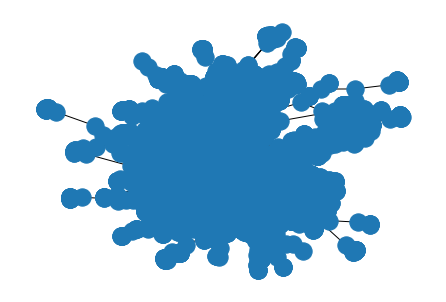

In [30]:
c=0
for component in list(nx.connected_components(G)):
    c += 1
nx.draw(G)
print('number of nodes = {} \n'
    'number of edges = {} \n'
    'number of components = {}'.format(G.number_of_nodes(), G.number_of_edges(),c))

In [31]:
#salvare net con un solo component
nx.write_gexf(G,'final_net.gexf') 

In [32]:
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
print(len(S))

1


In [33]:
for e in S:
    print(e)

Graph with 10184 nodes and 11968 edges


In [34]:
for i,e in enumerate(S):
    print('component',i)
    print(list(e.nodes.data()))

component 0
[(290883, {'category': 'pax'}), (1471971, {'category': 'proukr'}), (2052911, {'category': 'pax'}), (2827221, {'category': 'dontcare'}), (3688111, {'category': 'proukr'}), (4254951, {'category': 'proukr'}), (4615341, {'category': 'proukr'}), (4937571, {'category': 'pax'}), (5404582, {'category': 'pax'}), (5516892, {'category': 'proukr'}), (5749002, {'category': 'proukr'}), (5849252, {'category': 'proukr'}), (6266142, {'category': 'proukr'}), (6691762, {'category': 'proukr'}), (7078452, {'category': 'proukr'}), (7703052, {'category': 'proukr'}), (7777302, {'category': 'proukr'}), (8007502, {'category': 'proukr'}), (8052182, {'category': 'proukr'}), (9063952, {'category': 'proukr'}), (9147152, {'category': 'proukr'}), (9731332, {'category': 'dontcare'}), (11025592, {'category': 'proukr'}), (11076222, {'category': 'dontcare'}), (11486222, {'category': 'dontcare'}), (11567702, {'category': 'pax'}), (12512292, {'category': 'proukr'}), (12610772, {'category': 'pax'}), (13301942, {

In [36]:
c_proukr = 0
c_pax = 0
c_nocare = 0
c_prorus= 0

for i,e in enumerate(S):
    for node in e.nodes.data():
        for idx,attribute in node[1].items():
            if attribute == "proukr":
                c_proukr += 1 
            elif attribute == "pax":
                c_pax += 1
            elif attribute == "prorus":
                c_prorus += 1
            elif attribute == "dontcare":
                c_nocare += 1

print('TOT USERS = {} \n'
      'proukr = {} \n'
      'pax = {} \n'
      'prorus = {} \n'
      'nocare = {} \n'.format(len(G.nodes),c_proukr,c_pax, c_prorus, c_nocare))
            

TOT USERS = 10184 
proukr = 6922 
pax = 2165 
prorus = 416 
nocare = 681 



In [41]:
def make_node_df(G):
    nodes = {}
    for node, attribute in G.nodes(data=True):
        if not nodes.get('node'):
            nodes['node'] = [node]
        else:
            nodes['node'].append(node)

        for key, value in attribute.items():
            if not nodes.get(key):
                nodes[key] = [value]
            else:
                nodes[key].append(value)

    return pd.DataFrame(nodes)

def make_edge_df(G):
    edges = {}
    for source, target, attribute in G.edges(data=True):

        if not edges.get('source'):
            edges['source'] = [source]
        else:
            edges['source'].append(source)

        if not edges.get('target'):
            edges['target'] = [target]
        else:
            edges['target'].append(target)

        for key, value in attribute.items():
            if not edges.get(key):
                edges[key] = [value]
            else:
                edges[key].append(value)
    return pd.DataFrame(edges)

In [42]:
df_final_nodes=make_node_df(G)
df_final_nodes.to_csv('df_final_nodes.csv')

In [43]:
df_final_edges=make_edge_df(G)
df_final_edges.to_csv('df_final_edges.csv')